# Expected Epidemic Size of Mask Model

$P(A_{L, 0}) = f_0(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$P(A_{L, 1}) = f_1(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$P(\text{wear a mask}) = m$

$A_{L, 0}$ := Node v becomes **active** at level L given he **wear** a mask

$A_{L, 1}$ := Node v becomes **active** at level L given he **doesn't wears** a mask


## 1. Condition on num of neighbors from lower level







$B_k$ := Node v has $k - 1$ lower level neighbors

$P(A_{L, i}) = \sum_{k = 0}^{\infty}{P(A_{L, i} | B_k) * P(B_k)}$

where

$i = 0,1$

$P(B_k) = \frac{k p_{k}}{\langle k\rangle}$




## 2. Condition on num of neighbors wearing a mask

$N$ := Num of neighbors wearing masks 
 
$N \sim \operatorname{Binomial}\left(k - 1, m\right)$


$ P(A_{L, i} | B_k) = \sum_{n = 0}^{k - 1} P(A_{L, i} | B_k, N = n) * \left(\begin{array}{c}
k - 1 \\
n
\end{array}\right) * m^{n} * (1 - m)^{k - 1 - n} $

## 3. Condition on num of active lower level neighbors

$I_0$ := $I_0$ of $k-1$ lower level neighbors active and wear masks

$I_1$ := $I_1$ of $k-1$ lower level neighbors active and don't wear masks

$I_0 \sim \operatorname{Binomial}\left(n, P(A_{L-1,0})\right)$

$I_1 \sim \operatorname{Binomial}\left(k - 1 - n, P(A_{L-1,1})\right)$


$P(A_{L, i} | B_k, N = n) = \sum_{k_0 = 0}^{n}\sum_{k_1 = 0}^{k-1-n}P(A_{L, i} | B_k, N = n, I_0 = k_0, I_1 = k_1) * \left(\begin{array}{c}
n \\
k_0
\end{array}\right) \left(\begin{array}{c}
k - 1 - n \\
k_1
\end{array}\right) * P(A_{L-1, 0})^{k_0} * (1 - P(A_{L-1,0}))^{n - k_0} * P(A_{L-1, 1})^{k_1} * (1 - P(A_{L-1, 1}))^{k - 1 - n - k_1}$

where

$i = 0,1$

## 4. $P(A_{L, i} | B_k, N = n, I_0 = k_0, I_1 = k_1)$

$R$ := $B_k, N = n, I_0 = k_0, I_1 = k_1$

### 4.1 $P(A_{L,0} | R)$

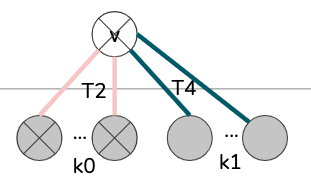

$P(A_{L,0} | R)$

$ = P(\text{At least 1 of node v's active neighbors succssfully infects it, given node v wears a mask} | R)$

$ = 1 - (1 - T_2)^{k_0} * (1 - T_4)^{k_1}$

### 4.1 $P(A_{L,1} | R)$

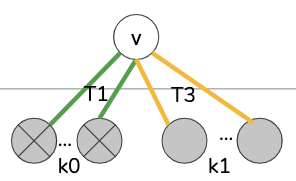

$P(A_{L,1} | R)$

$ = P(\text{At least 1 of node v's active neighbors succssfully infects it, given node v doesn't a mask} | R)$

$ = 1 - (1 - T_1)^{k_0} * (1 - T_3)^{k_1}$

In [1]:
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.special import comb
from scipy import optimize 

In [2]:
# def generate_degree_list(mean_degree, nodeN):
#     degree_max = nodeN - 1
#     p_k = dict() # k: degree, v: prob
#     for degree in range(1 , degree_max + 1):
#         p_k[degree] = poisson.pmf(degree, mean_degree)
#         if p_k[degree] < 10 ** (- math.log10(nodeN) - 1): # Stop when the prob < 1/node_num (like a thr)
#             break
#     return p_k, degree

In [4]:
0.6 * 0.4

0.24

In [5]:
0.6 * 0.3

0.18

In [3]:
def generate_new_transmissibilities_mask(T_mask1, T_mask2, T, m):
    T1 = T * T_mask1 
    T2 = T * T_mask1 * T_mask2
    T3 = T 
    T4 = T * T_mask2

#     T1 = T * T_mask1 * T_mask2 * m
#     T2 = T * T_mask1 * (1 - m), roundN
#     T3 = T * (1 - m), roundN
#     T4 = T * T_mask2 * m , roundN

    trans_dict = {'T1': T1,
                  'T2': T2,
                  'T3': T3,
                  'T4': T4}

    print("T1: %.5f" %T1)
    print("T2: %.5f" %T2)
    print("T3: %.5f" %T3)
    print("T4: %.5f" %T4)
    
    return trans_dict    

def generate_new_transmissibilities_mutation(T_mask1, T_mask2, T, m):
#     roundN = 5 # Round T to roundN digits
#     T1 = round(T * T_mask * T_mask * m, roundN)
#     T2 = round(T * T_mask * (1 - m), roundN)
#     T3 = round(T * (1 - m), roundN)
#     T4 = round(T * T_mask * m , roundN)
    trans_dict = generate_new_transmissibilities_mask(T_mask1, T_mask2, T, m)
    T1 = trans_dict['T1']
    T2 = trans_dict['T2']
    T3 = trans_dict['T3']
    T4 = trans_dict['T4']
    

    Q1 = T1 * (1 - m) + T2 * m
    Q2 = T3 * (1 - m) + T4 * m

    mu11 = T2 * m / Q1
    mu12 = T1 * (1 - m) / Q1
    mu22 = T3 * (1 - m) / Q2
    mu21 = T4 * m / Q2

    trans_dict = {'Q1': Q1,
                  'Q2': Q2,}
    
    mu_dict = {'mu11': mu11,
               'mu12': mu12,
               'mu22': mu22,
               'mu21': mu21,}

    print("Q1: %.5f" %Q1)
    print("Q2: %.5f" %Q2)
    
#     print("T1: %.5f" %T1)
#     print("T2: %.5f" %T2)
#     print("T3: %.5f" %T3)
#     print("T4: %.5f" %T4)

    print("mu11: %.5f" %mu11)
    print("mu12: %.5f" %mu12)
    print("mu22: %.5f" %mu22)
    print("mu21: %.5f" %mu21)
    return trans_dict, mu_dict

In [4]:
def P_A_given_R(i, T_list, k0, k1):
    one_minus_T1 = 1 - T_list[0]
    one_minus_T2 = 1 - T_list[1]
    one_minus_T3 = 1 - T_list[2]
    one_minus_T4 = 1 - T_list[3]
    if i == 0:
        res = 1 - (one_minus_T2 ** k0) * (one_minus_T4 ** k1)
    else:
        res = 1 - (one_minus_T1 ** k0) * (one_minus_T3 ** k1)
    assert res >= 0, "P_A_given_R should be greater than 0"
    assert res <= 1, "P_A_given_R should be less than 1"
    return res

In [5]:
def P_A_given_B_N(i, k, n, T_list, A_0, A_1):
    one_minus_A0 = 1 - A_0
    one_minus_A1 = 1 - A_1
    
    p_abn = 0
    
    for k0 in range(n + 1):
        for k1 in range(k - n):
            p_a_given_r = P_A_given_R(i, T_list, k0, k1)
            p_abn += p_a_given_r * \
                     comb(n, k0) * \
                     comb(k - 1 - n, k1) * \
                     (A_0 ** k0) * \
                     (A_1 ** k1) * \
                     (one_minus_A0 ** (n - k0)) * \
                     (one_minus_A1 ** (k - 1 - n - k1))


#     assert p_ab >= 0, "P_AB should be greater than 0"
#     assert p_ab <= 1, "P_AB should be less than 1"
    return p_abn

In [ ]:
def P_A_given_B(i, k, T_list, A_0, A_1, m):
    p_ab = 0
    for n in range(k):
        p_abn = P_A_given_B_N(i, k, n, T_list, A_0, A_1)
        p_ab += p_abn * comb(k - 1, n) * \
                (m ** n) * \
                ((1 - m) ** (k - 1 - n))
    return p_ab

In [7]:
def P_A(i, mean_degree, nodeN, T_list, m, A_0, A_1):
#     P_k_dict, k_max = generate_degree_list(mean_degree, nodeN)
    pa_L = 0
    print("K_max in PA", k_max)
    for k in range(0, k_max):
#         if k not in P_k_dict.keys():
#             p_k = 0
#         else:
#             p_k = P_k_dict[k]
        p_k = poisson.pmf(k, mean_degree)
        p_b = k * p_k / mean_degree
        p_ab = P_A_given_B(i, k, T_list, A_0, A_1, m)
        pa_L += p_ab * p_b
        
#         assert pa_L >= 0, "P_A should be greater than 0"
#         assert pa_L < 1, "P_A should be less than 1"
    return rho + (1 - rho)*pa_L

In [8]:
def p_A_vec(mean_degree, nodeN, T_list, m, A_0, A_1):
    A0 = P_A(0, mean_degree, nodeN, T_list, m, A_0, A_1)
    A1 = P_A(1, mean_degree, nodeN, T_list, m, A_0, A_1)
    return [A0, A1]

def func_fix(A, mean_degree, nodeN, T_list, m):
    return np.array(p_A_vec(mean_degree, nodeN, T_list, m, A[0], A[1]))

def func_root(A, mean_degree, nodeN, T_list, m):
#     return np.array([P_A(0, mean_degree, nodeN, T_list, m, A[0], A[1]) - A[0], 
#                      P_A(1, mean_degree, nodeN, T_list, m, A[0], A[1]) - A[1]])
    return np.array(p_A_vec(mean_degree, nodeN, T_list, m, A[0], A[1])) - np.array(A)

In [9]:
"""
The only change from the orignial jupyter
"""
def get_EpidemicSize(mean_degree, nodeN, T_list, m):
    ### First solve f(q) = q, then do the ieration for the last level(where everything could reach k) ###
    init_A = (0.9, 0.9)

    A_0_1_root = optimize.fsolve(func_root, init_A, args=(mean_degree, nodeN, T_list, m))
    pa_L_0 = 0
    pa_L_1 = 0
    pa_L = 0
    
    print("K_max:", k_max)
    for k in range(0, k_max): # k now can start from 0, because for the last level the k could be 0
        p_k = poisson.pmf(k, mean_degree)
        p_ab_0 = 0
        p_ab_1 = 0
        
        for n in range(k + 1): # n can be k
            
            p_abn_0 = 0
            p_abn_1 = 0
            
            for k0 in range(n + 1): 
                for k1 in range(k - n + 1): # k1 can reach k - n
                    p_a_given_r_0 = P_A_given_R(0, T_list, k0, k1)
                    p_a_given_r_1 = P_A_given_R(1, T_list, k0, k1)
                    
                    p_abn_0 += p_a_given_r_0 * \
                             comb(n, k0) * \
                             comb(k - n, k1) * \
                             (A_0_1_root[0] ** k0) * \
                             (A_0_1_root[1] ** k1) * \
                             ((1 - A_0_1_root[0]) ** (n - k0)) * \
                             ((1 - A_0_1_root[1]) ** (k - n - k1))
                    
                    p_abn_1 += p_a_given_r_1 * \
                             comb(n, k0) * \
                             comb(k - n, k1) * \
                             (A_0_1_root[0] ** k0) * \
                             (A_0_1_root[1] ** k1) * \
                             ((1 - A_0_1_root[0]) ** (n - k0)) * \
                             ((1 - A_0_1_root[1]) ** (k - n - k1))
                    
            p_ab_0 += p_abn_0 * comb(k, n) * \
                    (m ** n) * \
                    ((1 - m) ** (k - n))
            p_ab_1 += p_abn_1 * comb(k, n) * \
                    (m ** n) * \
                    ((1 - m) ** (k - n))
            
        pa_L_0 += p_k * p_ab_0
        pa_L_1 += p_k * p_ab_1
        pa_L += p_k * (m * p_ab_0 + (1 - m) * p_ab_1) 
        
    return pa_L_0, pa_L_1, pa_L, 1 - np.array(A_0_1_root)

# Solve equation

 $\begin{cases}
      P(A_0) = f_0(P(A_0), P(A_1)) \\
      P(A_1) = f_1(P(A_0), P(A_1))
    \end{cases}       $

In [32]:
"""
Parameters setup.
"""
T_mask1 = 0.4 # Efficiency of the mask
T_mask2 = 0.6
T = 0.6      # Original virus transmissiblity
m = 0.6      # P(people wear mask)
nodeN = 20000000

rho = 1/nodeN

# dict_M = generate_new_transmissibilities_mask(T_mask1, T_mask2, T, m)

T_list = list(generate_new_transmissibilities_mask(T_mask1, T_mask2, T, m).values())

mean_degree_list = np.linspace(0, 10, 50)
k_max = int(mean_degree_list[-1]) * 2

T1: 0.24000
T2: 0.14400
T3: 0.60000
T4: 0.36000


In [33]:
infection_size = []
infection_size0 = []
infection_size1 = []

for mean_degree in mean_degree_list:
#     print("Mean degree:", mean_degree)
    A_0_1 = get_EpidemicSize(mean_degree, nodeN, T_list, m)
    infection_size0.append(A_0_1[0])
    infection_size1.append(A_0_1[1])
    infection_size.append(A_0_1[2])

# plt.figure()
# plt.plot(mean_degree_list, infection_size, 'yo')
# plt.xlabel("Mean Degree")
# plt.ylabel("Infection Fraction")
# title = "Theoratical Infection Fraction for Mask Model"
# plt.title(title)
np.save("infection_size_md20.npy",infection_size)
np.save("infection_size0_md20.npy",infection_size0)
np.save("infection_size1_md20.npy",infection_size1)


K_max in PA 20
K_max in PA 20


/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20


/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in P

K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in P

K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max in PA 20
K_max: 20
K_max in PA 20
K_max in PA 20
K_max in PA 20


# Mutation theory code

In [34]:
def obtain_val_r_1(v1, v2, t1, lambda_r):
    val = 0

    for d_r in range(0, max_degree):
        if d_r == 0: continue

        prob_r = poisson.pmf(d_r, lambda_r)
        tmp_val = 0

        for k1 in range(0, d_r):
            for k2 in range(0, d_r - k1):
                if k1 == 0 and k2 == 0: continue

                extra_term = 0

                for x in range(1,k1+1):
                    for y in range(1,k2+1):
                        extra_term += comb(k1, x) * comb(k2, y) * t1**x * t2**y *\
                        (1-t1)**(k1-x) * (1-t2)**(k2-y) *\
                        ((x*u_r_11+y*u_r_21)/(x+y))

                a1 = (1-t1)**k1
                a2 = (1-t2)**k2
                tmp_val += comb(d_r - 1, k1) * comb(d_r - 1 - k1, k2) *(v1**k1) * (v2 ** k2) * \
                ((1 - v1 - v2) ** (d_r - 1 - k1 - k2)) *\
                (a2*(1-a1)*u_r_11 + a1*(1-a2)*u_r_21  + extra_term )

        val += d_r*prob_r*1.0/lambda_r * tmp_val

    return rho + (1 - rho)*val  #### 2. Why need to this? Shouldn't return val as q_{l + 1, i}? #### 
                                #=> rho: frac of seeds

def obtain_val_r_2(v1, v2, t2, lambda_r):
    val = 0

    for d_r in range(0, max_degree):
        if d_r == 0: continue
        prob_r = poisson.pmf(d_r, lambda_r)
        tmp_val = 0


        for k1 in range(0, d_r):
            for k2 in range(0, d_r - k1):
                if k1 == 0 and k2 == 0: continue

                extra_term = 0

                for x in range(1,k1+1):
                    for y in range(1,k2+1):
                        extra_term += comb(k1, x) * comb(k2, y) * t1**x * \
                        t2**y * (1-t1)**(k1-x) * (1-t2)**(k2-y) *\
                        ((x*u_r_12+y*u_r_22)/(x+y))

                a1 = (1-t1)**k1
                a2 = (1-t2)**k2
                tmp_val += comb(d_r - 1, k1) * comb(d_r - 1 - k1, k2) *(v1**k1) * (v2 ** k2) * \
                ((1 - v1 - v2) ** (d_r - 1 - k1 - k2)) *\
                (a2*(1-a1)*u_r_12 + a1*(1-a2)*u_r_22  + extra_term )

        val += d_r*prob_r*1.0/lambda_r * tmp_val

    return rho + (1 - rho)*val #### 2. Why need to this? Shouldn't return val as q_{l + 1, i}? #### 

def equations(p):
    v1, v2 = p
    val_r_1 = obtain_val_r_1(v1, v2, t1, lambda_r)
    val_r_2 = obtain_val_r_2(v1, v2, t2, lambda_r)

    return (v1 - val_r_1, v2 - val_r_2) 


def cascade_size(lambda_r):
    
    # 3. 
    # To be confirmed: h_r_1, h_r_2 are prob of Emergence?
    h_r_1, h_r_2 = optimize.fsolve(equations, (0.9, 0.9), xtol=1e-10) # Get roots q1 and q2

    H = 0
    H1 = 0
    H2 = 0
    
    # 4. Cascade size(infection frac)
    # Rashad: Doing one more iteration of infection
    # Yurun: start from [0.1, 0.1], then keep the iterations to the level of inf
    
    # 5. To be confrimed: cascade size here is infection frac or epidemic size? 
    
    for d_r in range(0, max_degree): 
        prob_r = poisson.pmf(d_r, lambda_r)
        tmp_val1 = 0
        tmp_val2 = 0

        for k1 in range(0, d_r + 1):
            for k2 in range(0, d_r + 1 - k1):
                extra_term_1 = 0
                extra_term_2 = 0
                for x in range(1,k1+1):
                    for y in range(1,k2+1):
                        extra_term_1 += comb(k1, x) * comb(k2, y) * t1**x *\
                        t2**y * (1-t1)**(k1-x) * (1-t2)**(k2-y) *\
                        ((x*u_r_11+y*u_r_21)/(x+y))
                        extra_term_2 += comb(k1, x) * comb(k2, y) * t1**x *\
                        t2**y * (1-t1)**(k1-x) * (1-t2)**(k2-y) *\
                        ((x*u_r_12+y*u_r_22)/(x+y))

                a1 = (1-t1)**k1
                a2 = (1-t2)**k2
                tmp_val1 += comb(d_r , k1) * comb(d_r - k1, k2) *(h_r_1**k1) * (h_r_2 ** k2) * \
                ((1 - h_r_1 - h_r_2) ** (d_r - k1 - k2)) *\
                (a2*(1-a1)*u_r_11 + a1*(1-a2)*u_r_21  + extra_term_1 )

                tmp_val2 += comb(d_r, k1) * comb(d_r - k1, k2) *(h_r_1**k1) * (h_r_2 ** k2) * \
                ((1 - h_r_1 - h_r_2) ** (d_r - k1 - k2)) *\
                (a2*(1-a1)*u_r_12 + a1*(1-a2)*u_r_22  + extra_term_2 )

        H += prob_r * (tmp_val1 + tmp_val2) 
        H1 += prob_r * tmp_val1
        H2 += prob_r * tmp_val2

    return (lambda_r, H, H1, H2, h_r_1, h_r_2)

def parse_args(args):
    parser = argparse.ArgumentParser(description = 'Parameters')
    parser.add_argument('-m', type = float, nargs = '+', default = np.arange(0.1, 10.1, 0.1), \
    help='np.linspace(0.001, 12, 100) (default); list of mean degree: you can type 1 3 5')
    parser.add_argument('-t1', type = float, default = 0.044, \
     help='0.5 (default); the transmissibility of strain-1')
    parser.add_argument('-t2', type = float, default = 0.12, \
    help='0.5 (default); the transmissibility of strain-2')
    parser.add_argument('-m1', type = float, default = 0.75, \
    help='0.5 (default); the mutation probability from 1 to 1')
    parser.add_argument('-m2', type = float, default = 0.75, \
    help='0.5 (default); the mutation probability from 2 to 2')
    return parser.parse_args(args)

# paras = parse_args(sys.argv[1:])
# t1 = paras.t1
# t2 = paras.t2
# m1 = paras.m1
# m2 = paras.m2
# mean_degree_list = paras.m

numNodes = 20000000;
rho = 1.0/numNodes
max_degree = int(mean_degree_list[-1]) * 2  #### 1. I am using 22, I stop when the p(degree) < 1/node_num ####


q_dict, mu_dict = generate_new_transmissibilities_mutation(T_mask1, T_mask2, T, m)
# t1 = 0.10800
# t2 = 0.20400
# m1 = 0.66667
# m2 = 0.47059

t1 = q_dict['Q1']
t2 = q_dict['Q2']
m1 = mu_dict['mu11']
m2 = mu_dict['mu22']
print("t1:", t1)
print("t2:", t2)
print("m1:", m1)
print("m2:", m2)


mean_degree_list = np.linspace(0, 10, 50)


infection_size_mu = []
infection_size0_mu = []
infection_size1_mu = []


for lambda_r in mean_degree_list:
    print(lambda_r)
    u_r_11 = m1
    u_r_12 = 1-u_r_11
    u_r_22 = m2
    u_r_21 = 1-u_r_22
    
    lambda_r, H, H1, H2, h_r_1, h_r_2 = cascade_size(lambda_r)
    infection_size_mu.append(H) 
    infection_size0_mu.append(H1)
    infection_size1_mu.append(H2)


T1: 0.24000
T2: 0.14400
T3: 0.60000
T4: 0.36000
Q1: 0.18240
Q2: 0.45600
mu11: 0.47368
mu12: 0.52632
mu22: 0.52632
mu21: 0.47368
t1: 0.1824
t2: 0.45599999999999996
m1: 0.4736842105263157
m2: 0.5263157894736842
0.0


/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


0.20408163265306123
0.40816326530612246
0.6122448979591837
0.8163265306122449
1.0204081632653061
1.2244897959183674
1.4285714285714286
1.6326530612244898
1.836734693877551
2.0408163265306123
2.2448979591836737
2.4489795918367347
2.6530612244897958
2.857142857142857
3.0612244897959187
3.2653061224489797
3.4693877551020407
3.673469387755102
3.8775510204081636
4.081632653061225
4.285714285714286
4.4897959183673475
4.6938775510204085
4.8979591836734695
5.1020408163265305
5.3061224489795915
5.510204081632653
5.714285714285714
5.918367346938775
6.122448979591837
6.326530612244898
6.530612244897959
6.73469387755102
6.938775510204081
7.142857142857143
7.346938775510204
7.551020408163265
7.755102040816327
7.959183673469388
8.16326530612245
8.36734693877551
8.571428571428571
8.775510204081632
8.979591836734695
9.183673469387756
9.387755102040817
9.591836734693878
9.795918367346939
10.0


In [35]:
# infection_size = np.load("infection_size_mask_0_20.npy")
# infection_size0 = np.load("infection_size_mask_1_20.npy")
# infection_size1 = np.load("infection_size_mask_avg_20.npy")

In [36]:
# infection_size_mu = np.load("../../../PythonScripts/infection_size_mu_20.npy")
# infection_size0_mu = np.load("../../../PythonScripts/infection_size0_mu_20.npy")
# infection_size1_mu = np.load("../../../PythonScripts/infection_size1_mu_20.npy")

In [37]:
# mean_degree_list = np.linspace(0, 20, 100)
# m = 0.6

Text(0.5, 1.0, 'Theoratical Epidemic Size\nm=0.60, T=0.60, tm1=0.40, tm2=0.60')

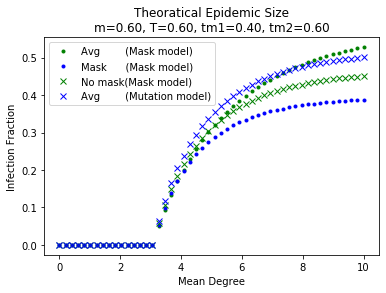

In [38]:
plt.figure()
# plt.plot(mean_degree_list, infection_size, 'r.')
plt.plot(mean_degree_list, np.array(infection_size0) * m, 'g.')
plt.plot(mean_degree_list, np.array(infection_size1) * (1 - m), 'b.')

# plt.plot(mean_degree_list, infection_size_mu, 'rx')
plt.plot(mean_degree_list, np.array(infection_size0_mu) , 'gx')
plt.plot(mean_degree_list, np.array(infection_size1_mu) , 'bx')

plt.legend(["Avg        (Mask model)", "Mask      (Mask model)", "No mask(Mask model)", 
            "Avg        (Mutation model)", "Strain-1 (Mutation model)", "Strain-2 (Mutation model)"])
plt.xlabel("Mean Degree")
plt.ylabel("Infection Fraction")
title = "Theoratical Epidemic Size\nm=%.2f, T=%.2f, tm1=%.2f, tm2=%.2f" %(m,T,T_mask1, T_mask2)
plt.title(title)

Text(0.5, 1.0, 'Theoratical Epidemic Size\nm=0.60, T=0.60, tm1=0.40, tm2=0.60')

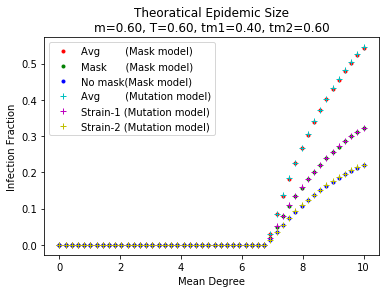

In [37]:
plt.figure()
plt.plot(mean_degree_list, infection_size, 'r.')
plt.plot(mean_degree_list, np.array(infection_size0) * m, 'g.')
plt.plot(mean_degree_list, np.array(infection_size1) * (1 - m), 'b.')

plt.plot(mean_degree_list, infection_size_mu, 'c+')
plt.plot(mean_degree_list, np.array(infection_size0_mu) , 'm+')
plt.plot(mean_degree_list, np.array(infection_size1_mu) , 'y+')

plt.legend(["Avg        (Mask model)", "Mask      (Mask model)", "No mask(Mask model)", 
            "Avg        (Mutation model)", "Strain-1 (Mutation model)", "Strain-2 (Mutation model)"])
plt.xlabel("Mean Degree")
plt.ylabel("Infection Fraction")
title = "Theoratical Epidemic Size\nm=%.2f, T=%.2f, tm1=%.2f, tm2=%.2f" %(m,T,T_mask1, T_mask2)
plt.title(title)

# Theoratical & simulation

In [26]:
# sim_mask_avg_size = np.load("../../../Mask2Results/081615:48_n2000000_e1000/Results/AvgValidSize.npy")
# sim_mask_size1 = np.load("../../../Mask2Results/081615:48_n2000000_e1000/Results/infSt1.npy")
# sim_mask_size2 = np.load("../../../Mask2Results/081615:48_n2000000_e1000/Results/infSt2.npy")

# sim_mask_path = '../../../Mask2Results/082822:20_n2000000_e100/Results/start-mask/'
sim_mask_path = '../../../Mask2Results/082510:49_n50000_e100/Results/'

sim_mask_avg_size = np.load(sim_mask_path + "AvgValidSize.npy")
sim_mask_size1 = np.load(sim_mask_path + "infSt1.npy")
sim_mask_size2 = np.load(sim_mask_path + "infSt2.npy")


# sim_mu_avg_size = np.load("../../../MutationResults/082317:14_n2000000_e100/Results/start-s1/AvgValidSize.npy")
# sim_mu_size1 = np.load("../../../MutationResults/082317:14_n2000000_e100/Results/start-s1/infSt1.npy")
# sim_mu_size2 = np.load("../../../MutationResults/082317:14_n2000000_e100/Results/start-s1/infSt2.npy")

In [33]:
sim_mask_avg_size.shape

(50,)

Text(0.5, 1.0, 'Epidemic Size for Mask Model')

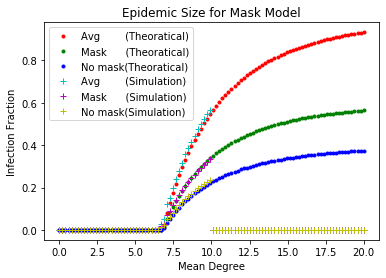

In [44]:
plt.figure()

plt.plot(mean_degree_list, infection_size, 'r.')
plt.plot(mean_degree_list, np.array(infection_size0) * m, 'g.')
plt.plot(mean_degree_list, np.array(infection_size1) * (1 - m), 'b.')

# plt.plot(mean_degree_list, infection_size_mu, 'cv')
# plt.plot(mean_degree_list, np.array(infection_size0_mu) , 'mv')
# plt.plot(mean_degree_list, np.array(infection_size1_mu) , 'yv')


plt.plot(mean_degree_list, np.concatenate((sim_mask_avg_size, np.zeros((50,))), ), 'c+')
plt.plot(mean_degree_list, np.concatenate((sim_mask_size1, np.zeros((50,))), ) , 'm+')
plt.plot(mean_degree_list, np.concatenate((sim_mask_size2, np.zeros((50,))), ) , 'y+')

# plt.plot(mean_degree_list, sim_mu_avg_size, 'cv')
# plt.plot(mean_degree_list, sim_mu_size1 , 'mv')
# plt.plot(mean_degree_list, sim_mu_size2 , 'yv')

plt.legend(["Avg        (Theoratical)", "Mask      (Theoratical)", "No mask(Theoratical)", 
            "Avg        (Simulation)",  "Mask      (Simulation)",  "No mask(Simulation)"])
plt.xlabel("Mean Degree")
plt.ylabel("Infection Fraction")
title = "Epidemic Size for Mask Model"
plt.title(title)

In [ ]:
plt.figure()

# plt.plot(mean_degree_list, infection_size, 'rx')
# plt.plot(mean_degree_list, np.array(infection_size0) * m, 'gx')
# plt.plot(mean_degree_list, np.array(infection_size1) * (1 - m), 'bx')

plt.plot(mean_degree_list, infection_size_mu, 'cx')
plt.plot(mean_degree_list, np.array(infection_size0_mu) , 'mx')
plt.plot(mean_degree_list, np.array(infection_size1_mu) , 'yx')


# plt.plot(mean_degree_list, sim_mask_avg_size, 'r+')
# plt.plot(mean_degree_list, sim_mask_size1 , 'g+')
# plt.plot(mean_degree_list, sim_mask_size2 , 'b+')

# plt.plot(mean_degree_list, sim_mu_avg_size, 'c+')
# plt.plot(mean_degree_list, sim_mu_size1 , 'm+')
# plt.plot(mean_degree_list, sim_mu_size2 , 'y+')


plt.plot(mean_degree_list, sim_mask_avg_size, 'r+')
plt.plot(mean_degree_list, sim_mask_size1 , 'g+')
plt.plot(mean_degree_list, sim_mask_size2 , 'b+')


plt.legend(["Avg        (Theoratical)", "Strain-1 (Theoratical)", "Strain-2 (Theoratical)", 
            "Avg        (Simulation)",  "Strain-1 (Simulation)",  "Strain-2 (Simulation)"])
plt.xlabel("Mean Degree")
plt.ylabel("Infection Fraction")
title = "Epidemic Size for Mutation Model"
plt.title(title)